# Installation

In [ ]:
!pip install numpy pandas matplotlib scikit-learn

# Importing

In [14]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Loading Dataset

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Feature

In [5]:
X = df[['sepal_length','petal_length']].values  # Features
y = iris.target 

In [6]:
iris_df = pd.DataFrame(data=X, columns=['Sepal Length','petal_length'])
iris_df['Species'] = y

# Let's take 'Setosa' vs. 'Non-setosa' for binary classification
iris_df['Binary Species'] = iris_df['Species'].apply(lambda x: 1 if x == 0 else 0)

In [7]:
iris_df.head()

,Sepal Length,petal_length,Species,Binary Species
0,5.1,1.4,0,1
1,4.9,1.4,0,1
2,4.7,1.3,0,1
3,4.6,1.5,0,1
4,5.0,1.4,0,1


In [8]:
X = iris_df[['Sepal Length','petal_length']].values
y = iris_df['Binary Species'].values

# Model Building

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Evaluation Metrics

In [10]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Visualization

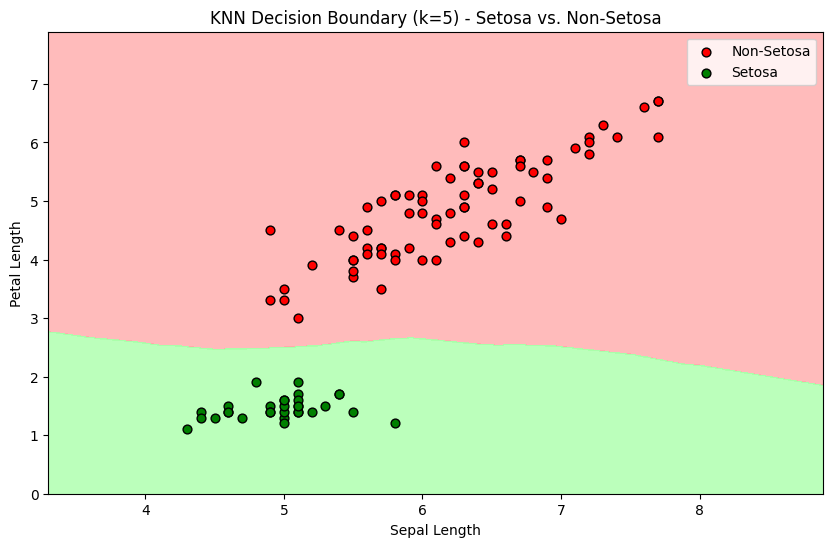

In [15]:
# Create a meshgrid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the binary class for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define color maps for binary classification
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ['red', 'green']

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot training points
for idx, color in zip([0, 1], cmap_bold):
    plt.scatter(X_train[y_train == idx, 0], X_train[y_train == idx, 1], 
                c=color, label='Setosa' if idx == 1 else 'Non-Setosa', edgecolor='k', s=40)

# Adding labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title("KNN Decision Boundary (k=5) - Setosa vs. Non-Setosa")
plt.legend(loc='upper right')
plt.show()


# Visualization - All Species

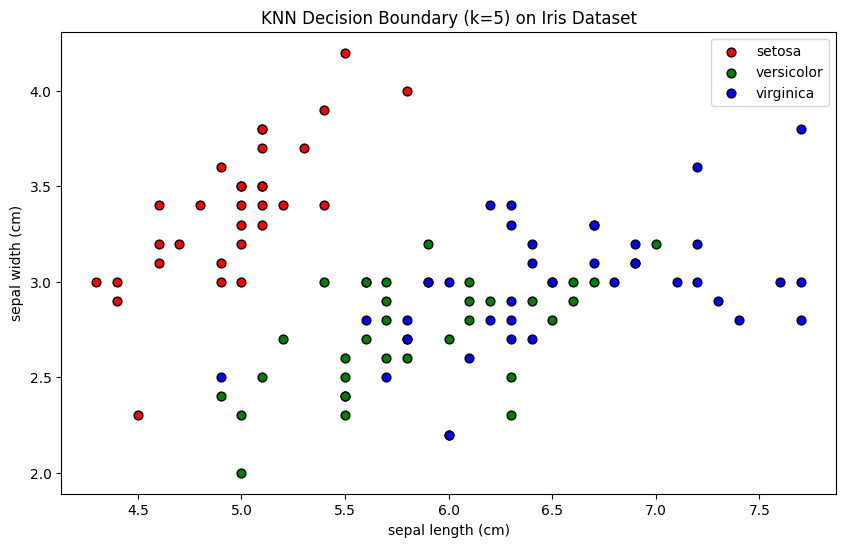

In [24]:
# Load the Iris dataset
X = iris.data[:, :2]  # Taking only the first two features (for easy 2D visualization)
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))

# Plot training points
for i, color in zip(range(3), cmap_bold):
    idx = np.where(y_train == i)
    plt.scatter(X_train[idx, 0], X_train[idx, 1], c=color, label=iris.target_names[i], edgecolor='k', s=40)

# Adding labels and title
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("KNN Decision Boundary (k=5) on Iris Dataset")
plt.legend(loc='upper right')
plt.show()